# Random Forest

# Read the CSV and Perform Basic Data Cleaning

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
claims_param = pd.read_csv("./Resources/accident_claimpgsql.csv")
# TEAM_CRASH copy/ML_starter_code_templates/claims_selected_features.csv

# Drop the null columns where all values are null
claims_param1 = claims_param.dropna(axis='columns', how='all')
# Drop the null rows
claims_param1.head()

,age,incident_hour_of_the_day,number_of_vehicles_involved,auto_make,auto_year,state,severity,start_time,end_time,temperature,humidity,visibility,wind_speed,precipitation
0,48,5,1,Saab,2004,NC,2,2019-10-07 17:43:09,2019-10-07 19:42:50,76.0,62.0,10.0,3.0,0.0
1,42,8,1,Mercedes,2007,CA,2,2020-12-13 21:53:00,2020-12-13 22:44:00,51.0,80.0,10.0,6.0,0.0
2,29,7,3,Dodge,2007,NV,2,2018-04-17 16:51:23,2018-04-17 17:50:46,53.6,16.0,10.0,4.6,NaN
3,41,5,1,Chevrolet,2014,FL,3,2016-08-31 17:40:49,2016-08-31 18:10:49,84.2,84.0,10.0,13.8,NaN
4,44,20,1,Accura,2009,NC,3,2018-10-17 16:40:36,2018-10-17 17:10:18,73.4,33.0,10.0,6.9,NaN


In [4]:
claims_param1.columns

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'auto_make', 'auto_year', 'state', 'severity', 'start_time', 'end_time',
       'temperature', 'humidity', 'visibility', 'wind_speed', 'precipitation'],
      dtype='object')

In [6]:
# Set features for training & testing. This will also be used as your x values.
claims_trining_features = claims_param1[['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'severity', 'visibility','temperature', 'humidity', 'wind_speed', 'auto_year']].dropna()
# DataFrame with new columns
print(claims_trining_features.columns)

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'severity', 'visibility', 'temperature', 'humidity', 'wind_speed',
       'auto_year'],
      dtype='object')


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
X = claims_trining_features
y = claims_trining_features['severity']
print(X.shape, y.shape)

(898, 9) (898,)


In [8]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
training_score = rf.score(X_train, y_train)
testing_score = rf.score(X_test, y_test)
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 1.0
Testing Data Score: 0.9955555555555555


In [10]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
sorted(zip(rf.feature_importances_, claims_trining_features), reverse=True)

[(0.8588033152613551, 'severity'),
 (0.03242992267374154, 'temperature'),
 (0.023974969506487757, 'age'),
 (0.02150449267915359, 'humidity'),
 (0.01845459553644075, 'wind_speed'),
 (0.018413615602667563, 'auto_year'),
 (0.01707280559183023, 'incident_hour_of_the_day'),
 (0.004765152109819133, 'number_of_vehicles_involved'),
 (0.004581131038504341, 'visibility')]

In [15]:
# Make predictions with the model
predictions = rf.predict(X_test)

In [16]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
220,2,2
221,2,2
222,2,2
223,3,3


In [17]:
results.head(10)

,Prediction,Actual
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
5,3,3
6,2,2
7,3,3
8,2,2
9,2,2


In [18]:
results.tail(10)

,Prediction,Actual
215,2,2
216,2,2
217,2,2
218,2,2
219,4,4
220,2,2
221,2,2
222,2,2
223,3,3
224,2,2


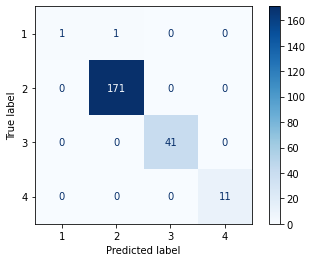

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues")
plt.show()

In [20]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

In [21]:
# Saving model by updating "your_name" with Adebayo
# and "your_model" with model variable
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_RF6.sav'
joblib.dump(rf, filename)

['Adebayo_RF6.sav']

In [22]:
!pip install sqlalchemy
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

In [23]:
csv_file = "./Resources/accident_claimpgsql.csv"
claims_df = pd.read_csv(csv_file)
claims_df.head()

,age,incident_hour_of_the_day,number_of_vehicles_involved,auto_make,auto_year,state,severity,start_time,end_time,temperature,humidity,visibility,wind_speed,precipitation
0,48,5,1,Saab,2004,NC,2,2019-10-07 17:43:09,2019-10-07 19:42:50,76.0,62.0,10.0,3.0,0.0
1,42,8,1,Mercedes,2007,CA,2,2020-12-13 21:53:00,2020-12-13 22:44:00,51.0,80.0,10.0,6.0,0.0
2,29,7,3,Dodge,2007,NV,2,2018-04-17 16:51:23,2018-04-17 17:50:46,53.6,16.0,10.0,4.6,NaN
3,41,5,1,Chevrolet,2014,FL,3,2016-08-31 17:40:49,2016-08-31 18:10:49,84.2,84.0,10.0,13.8,NaN
4,44,20,1,Accura,2009,NC,3,2018-10-17 16:40:36,2018-10-17 17:10:18,73.4,33.0,10.0,6.9,NaN


In [25]:
json_file = ("./Resources/claims_accidents.json")
# ML_starter_code_templates/Resources/insurance_claims.json

claims_df = pd.read_json(json_file)
# claims_df.head()

ValueError: Expected object or value

In [23]:
# rds_connection_string = "CommAde1@hotmail.com:Kola@#$1463@localhost:5432/claims_db"
# engine = create_engine(f'postgresql://{rds_connection_string}')

In [ ]:
# engine.table_names()

In [ ]:
# new_claims_df.to_sql(name='claims', con=engine, if_exists='append', index=False)

In [ ]:
# pd.read_sql_query('select * from claims', con=engine).head()